# Edge detection on 2-D images: Compare different approaches
* Name: Pranjal Baranwal
* Roll No.: 200101083

## Outline 
* Introduction
* Techniques Used
  * Roberts
  * Prewitt
  * Sobel
  * Canny
  * Scharr
  * Deep learning based

* Current Research
  * Models
  * Datasets

* Use Cases
  * Research Based
  * A funny Story

## Introduction
Before we dive in throught the concepts, firstly let me show you a picture.
> You might have seen this image when scrolling through instagram describing if you view this and that in this image you are more creative/left brained and bla bla.

![original image](https://i.pinimg.com/564x/94/27/d5/9427d55e069908bbcf749f5791c01a58.jpg)

Now without any context let's see what edge detection algorithms tell us about this image

![edge_teaser](edge_teaser.png).

It seems that the second edge detection is more accurate since it shows more white areas meaning more edges. But the first one is actually better. To appreciate that, try finding the horse in the second one. You will see that it doesn't contain sharp edges to do so. Now you will appreciate that the first one is "humanly" more accurate and probably the artist who created this might have used the outline sketch same as the first one to create this image.

### What is Edge Detection?

Edge detection is an important technique in computer vision that helps in identifying the boundaries of objects within images. It works by detecting discontinuities in brightness. These discontinuities are called edges. Edges are the points in an image where the brightness of the image changes sharply.

The edge detection task is highly challenging mostly due to presence of inherent noise in the image. We want the edge detection algorithm to be robust to noise and be able to detect edges accurately. 

## Techniques Used

Before we go through the techniques, let's first see the earliest foundations of edge detection algorithms.
1. From the definition we saw above, the edges are the points where the brightness changes very rapidly. So, we want to maximize the gradient(slope?) of the brightness function. 
2. This leads us to the simplest edge detection algorithm using the derivative of the image. Mathematically,

$$ \nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} $$

3. The $$f$$ vector above highlights the path of steepest accent in the image. The magnitude is the rate of change of brightness.

4. This basic technique has a lot of limitations:
  * It is very sensitive to noise.
  * Taking image derivatives accenuates the higher frequencies thus amplifying the noise.
  * We would like the edge detection algorithm to be independent of orientation. This is not the case with the above algorithm. 
  * Calculating the derivative is computationally expensive.


5. So starting with this approach was admissible but still it has limitations. So, we take a new technique of averaging the pixels in a region using a mask. This techniques is called convolution.

![convolution](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/70_blog_image_3.png)

In the above we take a submatrix of the image conformable with the mask and multiply the elements of the mask with the corresponding elements of the submatrix and sum them up. This gives us the new pixel value.


There are many techniques used for edge detection. Some of them are conventional requiring a convolutional operation on the image itself while some of them are deep learning based. Here we will discuss some of the conventional techniques.

> Since this tutorial is only for learning purpose, we will be using the OpenCV library although we will try to implement one of the operator based algoithms from scratch. Here, that being the Roberts operator. We have used 9 images for comparison. The images are present in the dataset folder.

### Traditional Techniques

#### Roberts Operator

The Roberts operator is a simple convolution based edge detection technique. It uses two masks to calculate the gradient of the image. The masks are as follows:

$$ G_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$
$$ G_y = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} $$

The gradient of the image is calculated as follows:

$$ G = \sqrt{G_x^2 + G_y^2} $$



In [11]:
# importing the libraries
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk

In [12]:
def roberts_cross(img_path):
    # Read the image using OpenCV
    
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Define the Roberts Cross kernels for horizontal and vertical edge detection.
    gx = np.array([[1, 0], [0, -1]])
    gy = np.array([[0, 1], [-1, 0]])
    
    # Apply convolution operations to calculate horizontal and vertical gradients.
    gradient_x = ndimage.convolve(image, gx)
    gradient_y = ndimage.convolve(image, gy)
    
    # Compute the magnitude of the gradient using the square root of the sum of squares.
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    
    
    
    return magnitude

Here you will get a slider which you can adjust to see the effect of threshold on the image. The best result I got was at 10. You can try different values to see the effect.

Threshold: 0
Threshold: 5
Threshold: 4
Threshold: 10
Threshold: 10
Threshold: 15
Threshold: 16
Threshold: 19
Threshold: 20
Threshold: 10


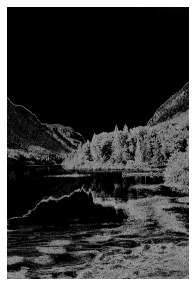

In [16]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
magnitude=[]
def update_value(event):
    # This function is triggered whenever the slider value changes
    
    
    value = int(slider.get())
    print("Threshold:", value)
    edges= magnitude > value
    
    
    # Update the plot
    ax.clear()
    ax.imshow(edges, cmap='gray')
    ax.axis('off')
    canvas.draw()

# Image path
image_path = "dataset/alice-triquet-HeEJU3nrg_0-unsplash.jpg"

# Create a Tkinter window
root = tk.Tk()
root.title("Use the slider to change the threshold value")
magnitude = roberts_cross(image_path)
# Create a slider widget
slider = ttk.Scale(root, from_=0, to=20, orient="horizontal", command=update_value)
slider.pack(padx=20, pady=20)

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.axis('off')


# Embed the matplotlib figure into Tkinter
canvas = FigureCanvasTkAgg(fig, master=root)
canvas_widget = canvas.get_tk_widget()
canvas_widget.pack()

# Run the Tkinter event loop
root.mainloop()